# Course from OpenCV org

https://www.youtube.com/watch?v=P4Z8_qe2Cu0&ab_channel=freeCodeCamp.org


## Setup, imports and helper functions

In [1]:
# imports
import cv2
from matplotlib import pyplot as plt
import numpy as np
import glob

import sys
import os
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import urllib

def cv2_imshow(data, figsize = (18, 15), cols = 2, rows = 3):
    plt.subplots_adjust(hspace=0.5)
    plt.figure(figsize = figsize)

    for i, (image, title) in enumerate(data):
        ax1 = plt.subplot(rows, cols, i + 1)
        ax1.set_title(title)
        ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    plt.show()

In [ ]:
image = cv2.imread('images/New_Zealand_Lake.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

h, s, v = cv2.split(hsv)
merged = cv2.merge([h + 20, s, v])
merged = cv2.cvtColor(merged, cv2.COLOR_HSV2BGR)

cv2_imshow([(image, "Original"), (merged, "Merged")])

cv2.imwrite("images/New_Zealand_Lake_SAVED.jpg", merged)

## Image manipulation

### Crop image 

In [ ]:
image = cv2.imread('images/checkerboard_color.png')
cv2_imshow([(image, "Original"), (image[100:300, 100:500], "Cropped")])

### Resize

In [ ]:
image = cv2.imread('images/lion.jpg')
print(image.shape)

newHeight = 600
aspectRatio = newHeight / image.shape[0]
newWidth = int(image.shape[1] * aspectRatio)

resizedImage = cv2.resize(image, (newWidth, newHeight))
cv2_imshow([(image, "Original"), (resizedImage, "Resized")])

### Flip

In [ ]:
image = cv2.imread('images/color.jpg')

# opencv flip image horizontally
flipHorizontal = cv2.flip(image, 1)
flipVertical = cv2.flip(image, -1)

cv2_imshow([(image, "Original"), (flipHorizontal, "Flip Horizontal"), (flipVertical, "Flip Vertical")])


### Brightness (add/subtract)

In [ ]:
image = cv2.imread('images/color.jpg')
matrix = np.ones(image.shape, dtype = "uint8") * 100

added = cv2.add(image, matrix)
subtracted = cv2.subtract(image, matrix)

cv2_imshow([(image, "Original"), (added, "Added"), (subtracted, "Subtracted")])

### Contract (multiplication)

In [ ]:
image = cv2.imread('images/person.jpg')
matrix = np.ones(image.shape)

imageFloatMatrix = np.float64(image)
darkImage = np.uint8(cv2.multiply(imageFloatMatrix, matrix * .5))
lightImage = np.uint8(np.clip(cv2.multiply(imageFloatMatrix, matrix * 1.6), 0, 255))

cv2_imshow([(image, "Original"), (darkImage, "Dark"), (lightImage, "Light")])


### Threshhold


In [ ]:
image = cv2.imread('images/Piano_Sheet_Music.png', cv2.IMREAD_GRAYSCALE)

retval, threshold1 = cv2.threshold(image, 50, 255, cv2.THRESH_BINARY)
retval, threshold2 = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)

adaptThresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

cv2_imshow([
    (image, "Original"), 
    (threshold1, "Threshold 1"), 
    (threshold2, "Threshold 2"), 
    (adaptThresh, "Adaptive Threshold")
    ])

### Binary operations

In [ ]:
imageRect = cv2.imread('images/rectangle.jpg')
imageCircle = cv2.imread('images/circle.jpg')

andOperation = cv2.bitwise_and(imageRect, imageCircle)
orOperation = cv2.bitwise_or(imageRect, imageCircle)
notOperation = cv2.bitwise_not(imageRect)
xorOperation = cv2.bitwise_xor(imageRect, imageCircle)

cv2_imshow([
    (imageRect, "Rectangle"), 
    (imageCircle, "Circle"), 
    (andOperation, "And Operation"),
    (orOperation, "Or Operation"),
    (notOperation, "Not Operation"),
    (xorOperation, "Xor Operation")
    ], 
    figsize=(15, 10))

In [ ]:
imageLogo = cv2.imread('images/coca-cola-logo.png')
imageBackground = cv2.imread('images/checkerboard_color.png')

# resize the background image to match the logo
aspectRatio = imageLogo.shape[1] / imageBackground.shape[1]
dim = (imageLogo.shape[1], int(imageBackground.shape[1] * aspectRatio))
imageBackground = cv2.resize(imageBackground, dim)

# create mask
grayLogo = cv2.cvtColor(imageLogo, cv2.COLOR_BGR2GRAY)
retval, logo_mask = cv2.threshold(grayLogo, 127, 255, cv2.THRESH_BINARY)

logo_mask_inv = cv2.bitwise_not(logo_mask)

newLetterColor = cv2.bitwise_and(imageBackground, imageBackground, mask=logo_mask)
withoutLetters = cv2.bitwise_and(imageLogo, imageLogo, mask=logo_mask_inv)
newLogo = cv2.add(newLetterColor, withoutLetters)

cv2_imshow([
    (imageLogo, "Logo"), 
    (imageBackground, "Background"), 
    (newLetterColor, "New letters"),
    (withoutLetters, "Bg without letters"),
    (newLogo, "New logo")
    ], cols=3)

## Image aligment

### Step 1: Read Template and Scanned Images

In [ ]:
# formReference = cv2.imread('images/form_reference.jpg')
# form = cv2.imread('images/form_scanned.jpg')

refFilename = "images/form_reference.jpg"
print("Reading reference image : ", refFilename)
formReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)
formReference = cv2.cvtColor(formReference, cv2.COLOR_BGR2RGB)

# Read image to be aligned
imFilename = "images/form_scanned.jpg"
print("Reading image to align : ", imFilename)
form = cv2.imread(imFilename, cv2.IMREAD_COLOR)
form = cv2.cvtColor(form, cv2.COLOR_BGR2RGB)


cv2_imshow(data=[(formReference, "Form Reference"), (form, "Form")], cols=2, figsize=(15, 20))

### Step 2: Find keypoints in both images

In [ ]:
# convert to grayscale
grayFormReference = cv2.cvtColor(formReference, cv2.COLOR_BGR2GRAY)
grayForm = cv2.cvtColor(form, cv2.COLOR_BGR2GRAY)

# Detect ORB features and compute descriptors.
MAX_NUM_FEATURES = 500
orb = cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1 = orb.detectAndCompute(grayFormReference, None)
keypoints2, descriptors2 = orb.detectAndCompute(grayForm, None)

# Display keypoints.
imageRefDisplay = cv2.drawKeypoints(formReference, keypoints1, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imageScanDisplay = cv2.drawKeypoints(form, keypoints2, None, color=(0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2_imshow(data=[(imageRefDisplay, "Reference"), (imageScanDisplay, "Scanned")], cols=2, rows=1)


### Step 3: Match keypoints in the two images

In [ ]:
# Match features.
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
# matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(descriptors1, descriptors2, None)

# Sort matches by score
matches = sorted(matches, key = lambda x:x.distance)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]


# Draw top matches.
imageMatches = cv2.drawMatches(formReference, keypoints1, form, keypoints2, matches, None)

cv2_imshow(data=[(imageMatches, "Matches")], cols=1, rows=1)

### Step 4: Find Homography

In [ ]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

### Step 5: Warp image

In [ ]:
# Use homographty to warp image
height, width, channels = formReference.shape
imageReg = cv2.warpPerspective(form, h, (width, height))

# Display results
cv2_imshow(data=[(formReference, "Reference"), (form, "Scanned"), (imageReg, "Registered")], cols=3, rows=1)

### Step 6: Image Stitching, panoramic

In [ ]:
imageFiles = glob.glob(pathname="images/boat/*.jpg")
imageFiles.sort()

images = []
imagesTitle = []
for img in imageFiles:
    image = cv2.imread(img)
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)
    imagesTitle.append(img.split("/")[-1])

data = [(img, imagesTitle[i]) for i, img in enumerate(images)]
cv2_imshow(data=data, cols=3, rows=2, figsize=(15, 7))

In [ ]:
stitcher = cv2.Stitcher_create()
status, stitched = stitcher.stitch(images)
if status == 0:
    cv2_imshow(data=[(stitched, "Stitched")], cols=1, rows=1, figsize=(15, 7))

### Step 7: Dynamic Range Imaging (HDR)

In [ ]:
fileNames = ["images/hdr/img_0.033.jpg", "images/hdr/img_0.25.jpg", "images/hdr/img_2.5.jpg", "images/hdr/img_15.jpg"]
times = np.array([1/30.0, 0.25, 2.5, 15.0], dtype=np.float32)

images = []
for filename in fileNames:
    img = cv2.imread(filename)
    images.append(img)

cv2_imshow(data=[(img, filename.split("/")[-1]) for img, filename in zip(images, fileNames)], cols=2, rows=2, figsize=(8, 7))

In [ ]:
# align images
alignMTB = cv2.createAlignMTB()
alignMTB.process(images, images)

# Find Camera Response Function (CRF)
calibrateDebevec = cv2.createCalibrateDebevec()
responseDebevec = calibrateDebevec.process(images, times)

# Merge images into an HDR linear image
mergeDebevec = cv2.createMergeDebevec()
hdrDebevec = mergeDebevec.process(images, times, responseDebevec)

# Tonemap using Drago's method to obtain 24-bit color image
tonemapDrago = cv2.createTonemapDrago(1.0, 0.7)
ldrDrago = tonemapDrago.process(hdrDebevec)
ldrDrago = 3 * ldrDrago
cv2_imshow(data=[(ldrDrago, "Drago")], cols=1, rows=1, figsize=(8, 7))

## Tracking

### Project 1: Object Tracking

In [19]:
video_file_input = "videos/race_car.mp4"

def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (255, 0, 0), 2, 1)
        
def displayRectangle(frame, bbox):
    plt.figure(figsize=(20, 10))
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    frameCopy = cv2.cvtColor(frameCopy, cv2.COLOR_BGR2RGB)
    plt.imshow(frameCopy); plt.axis('off')

def drawText(frame, text, position, color=(255, 0, 0)):
    cv2.putText(frame, text, position, cv2.FONT_HERSHEY_SIMPLEX, 1.0, color, 2, cv2.LINE_AA)
    
    
if not os.path.isfile('goturn.prototxt') or not os.path.isfile('goturn.caffemodel'):
    print("Downloading GOTURN model zip file")
    urllib.request.urlretrieve('https://www.dropbox.com/sh/77frbrkmf9ojfm6/AACgY7-wSfj-LIyYcOgUSZ0Ua?dl=1', 'GOTURN.zip')
    
    # Uncompress the file
    !tar -xvf GOTURN.zip

    # Delete the zip file
    os.remove('GOTURN.zip')

In [12]:
%HTML("""
<video width="320" height="240" controls src='videos/race_car.mp4'></video>
""")

SyntaxError: invalid syntax (3722483762.py, line 2)

In [32]:
# Set up tracker
tracker_types = ['BOOSTING', 'MIL','KCF', 'CSRT', 'TLD', 'MEDIANFLOW', 'GOTURN','MOSSE']

# Change the index to change the tracker type
tracker_type = tracker_types[-2]

if tracker_type == 'BOOSTING':
    tracker = cv2.legacy_TrackerBoosting.create()
elif tracker_type == 'MIL':
    tracker = cv2.TrackerMIL_create()
elif tracker_type == 'KCF':
    tracker = cv2.TrackerKCF_create()
elif tracker_type == 'CSRT':
    tracker = cv2.legacy_TrackerCSRT.create()
elif tracker_type == 'TLD':
    tracker = cv2.legacy_TrackerTLD.create()
elif tracker_type == 'MEDIANFLOW':
    tracker = cv2.legacy_TrackerMedianFlow.create()
elif tracker_type == 'GOTURN':
    tracker = cv2.TrackerGOTURN_create()   
else:
    tracker = cv2.legacy_TrackerMOSSE.create()

In [33]:
# define output file
video = cv2.VideoCapture(video_file_input)
ok, frame = video.read()

if not video.isOpened():
    print("Could not open video")
    sys.exit()

height = int(video.get(propId=cv2.CAP_PROP_FRAME_HEIGHT))
width = int(video.get(propId=cv2.CAP_PROP_FRAME_WIDTH))

video_output_file = "videos/race_car-" + tracker_type + ".mp4"
video_out = cv2.VideoWriter(video_output_file, cv2.VideoWriter_fourcc(*'mp4v'), 20, (width, height))

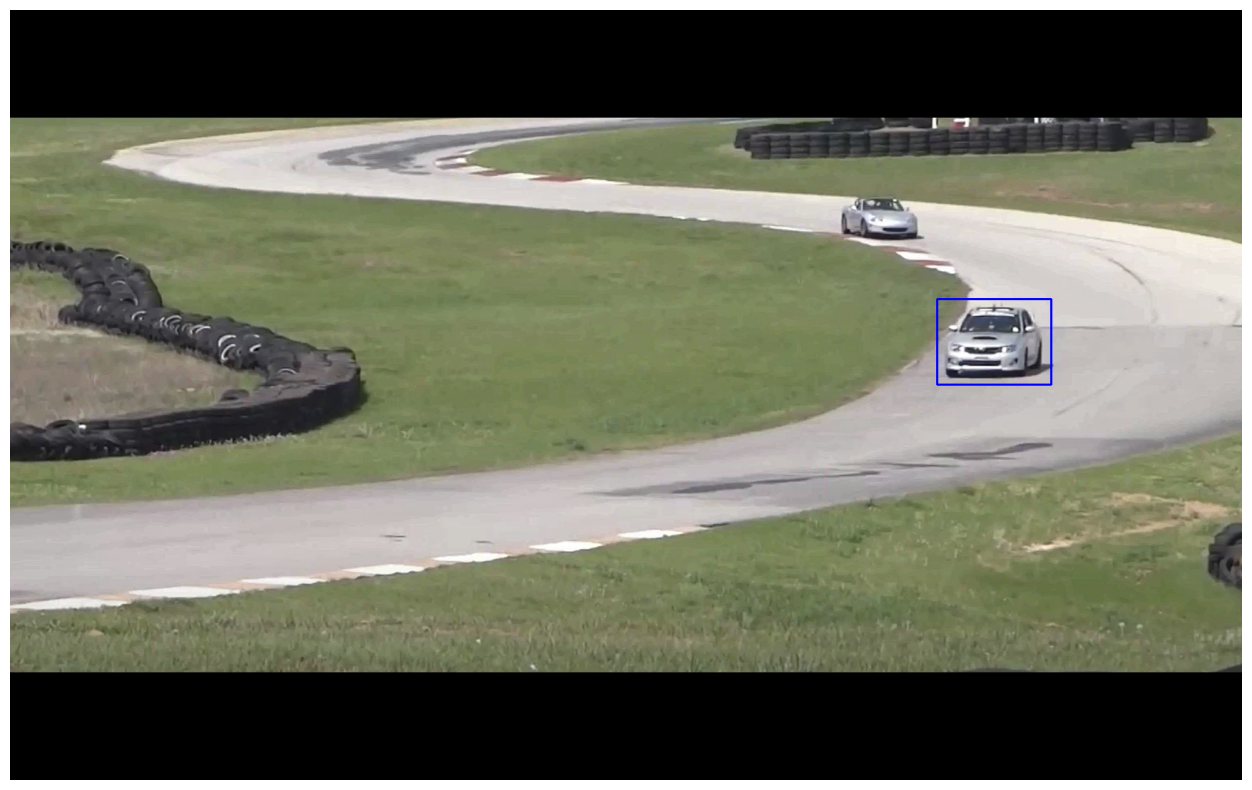

In [34]:
# define bounding box
bbox = (1300, 405, 160, 120)
# bbox = cv2.selectROI(frame, False)
# print(bbox)
displayRectangle(frame, bbox)

In [24]:
# initialize tracker with first frame and bounding box
ok = tracker.init(frame, bbox)

# read video frame by frame
while True:
    ok, frame = video.read()
    if not ok:
        break
    
    # Start timer
    timer = cv2.getTickCount()
    
    # Update tracker
    ok, bbox = tracker.update(frame)
    
    # calculate FPS
    fps = cv2.getTickFrequency() / (cv2.getTickCount() - timer)
    
    if ok:
        drawRectangle(frame, bbox)
    else:
        drawText(frame, "Tracking failure detected", (80, 140), (0, 0, 255))
    
    drawText(frame, tracker_type + " Tracker", (80, 60))
    drawText(frame, "FPS : " + str(int(fps)), (80, 100))
    
    video_out.write(frame)

video.release()
video_out.release()

### Project 2: face detection, check file face_detection.py

### Project 3: Deep learning base Object Detection

1. **Architecture** : Mobilenet based Single Shot Multi-Box (SSD)
2. **Framework** : Tensorflow

Model files can be downloaded from the Tensorflow Object Detection Model Zoo
https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

**The cell given below downloads a mobilenet model**

The code below will run on Linux / MacOS systems.
Please download the file http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz

Uncompress it and put it in models folder.

**ssd_mobilenet_v2_coco_2018_03_29** <br>
|─ checkpoint <br>
|─ **frozen_inference_graph.pb** <br>
|─ model.ckpt.data-00000-of-00001 <br>
|─ model.ckpt.index <br>
|─ model.ckpt.meta <br>
|─ pipeline.config <br>
|─ saved_model <br>
|─── saved_model.pb <br>
|─── variables <br>

In [2]:
FONTFACE = cv2.FONT_HERSHEY_SIMPLEX
FONT_SCALE = 0.7
THICKNESS = 1

modelFile = "models/frozen_inference_graph.pb"
configFile = "models/ssd_mobilenet_v2_coco_2018_03_29.pbtxt"
classFile = "models/coco_class_labels.txt"

# Read class labels
with open(classFile) as fp:
    labels = fp.read().split("\n")

# Read the tensorflow model
net = cv2.dnn.readNetFromTensorflow(modelFile, configFile)

# Detect objects

def detect_objects(net, im):
    dim = 300
    
    # create a blob from image
    blob = cv2.dnn.blobFromImage(im, 1.0, size=(dim, dim), mean=(0,0,0), swapRB=True, crop=False)
    # set input to the network
    net.setInput(blob)
    # perdict
    objects = net.forward()
    return objects
    
def display_text(im, text, x, y):
    # Get text size 
    textSize = cv2.getTextSize(text, FONTFACE, FONT_SCALE, THICKNESS)
    dim = textSize[0]
    baseline = textSize[1]
            
    # Use text size to create a black rectangle    
    cv2.rectangle(im, (x,y-dim[1] - baseline), (x + dim[0], y + baseline), (0,0,0), cv2.FILLED);
    # Display text inside the rectangle
    cv2.putText(im, text, (x, y-5 ), FONTFACE, FONT_SCALE, (0, 255, 255), THICKNESS, cv2.LINE_AA)
    

def display_objects(im, objects, threshold = 0.25):
    rows = im.shape[0]; 
    cols = im.shape[1]

    # For every Detected Object
    for i in range(objects.shape[2]):
        # Find the class and confidence 
        classId = int(objects[0, 0, i, 1])
        score = float(objects[0, 0, i, 2])
        
        # Recover original cordinates from normalized coordinates
        x = int(objects[0, 0, i, 3] * cols)
        y = int(objects[0, 0, i, 4] * rows)
        w = int(objects[0, 0, i, 5] * cols - x)
        h = int(objects[0, 0, i, 6] * rows - y)
        
        # Check if the detection is of good quality
        if score > threshold:
            display_text(im, "{}".format(labels[classId]), x, y)
            cv2.rectangle(im, (x, y), (x + w, y + h), (255, 255, 255), 2)
    
    # Convert Image to RGB since we are using Matplotlib for displaying image
    mp_img = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(30,10)); plt.imshow(mp_img); plt.show();

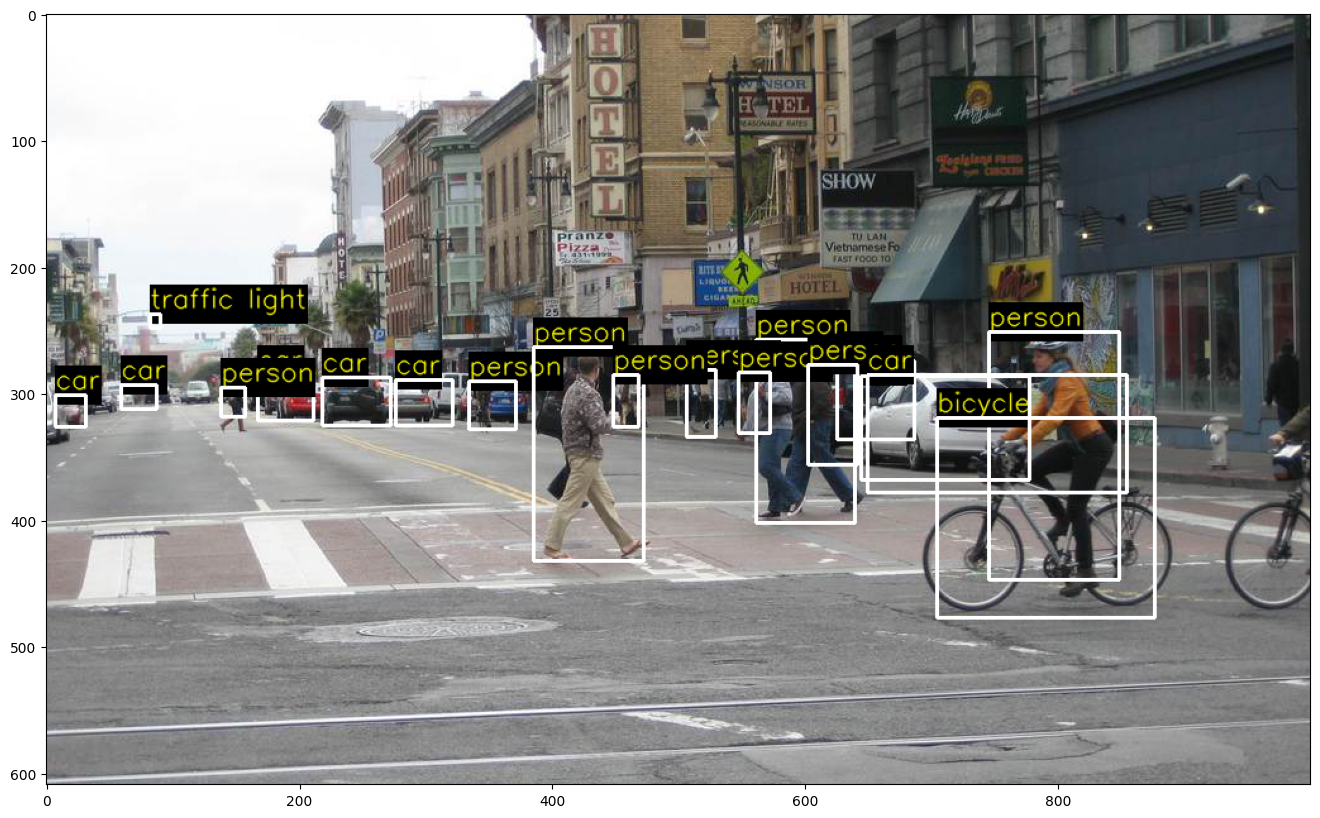

In [3]:
image = cv2.imread("images/street.jpg")
objects = detect_objects(net, image)
display_objects(image, objects)

### Project 4: Pose estimation

<Figure size 640x480 with 0 Axes>

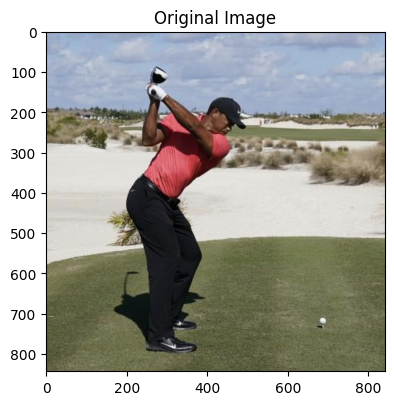

In [17]:
protoFile = "models/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "models/pose_iter_160000.caffemodel"

nPoints = 15
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]

net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

# read image
image = cv2.imread("images/Tiger_Woods_crop.png")
cv2_imshow([(image, "Original Image")])
inWidth = image.shape[1]
inHeight = image.shape[0]

# convert image to blob
netInputSize = (368, 368)
blob = cv2.dnn.blobFromImage(image, 1.0 / 255, netInputSize, (0, 0, 0), swapRB=False, crop=False)

# run inference (forward pass)
net.setInput(blob)
# Forward Pass
output = net.forward()


In [18]:
# extract points
scaleX = float(inWidth) / output.shape[3]
scaleY = float(inHeight) / output.shape[2]

points = []
threshold = 0.1

for i in range(nPoints):
    # obtain probability map
    probMap = output[0, i, :, :]
    # find global maxima of the probMap
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)
    
    # scale the point to fit on the original image
    x = scaleX * point[0]
    y = scaleY * point[1]
    
    if prob > threshold:
        points.append((int(x), int(y)))
    else:
        points.append(None)

<Figure size 640x480 with 0 Axes>

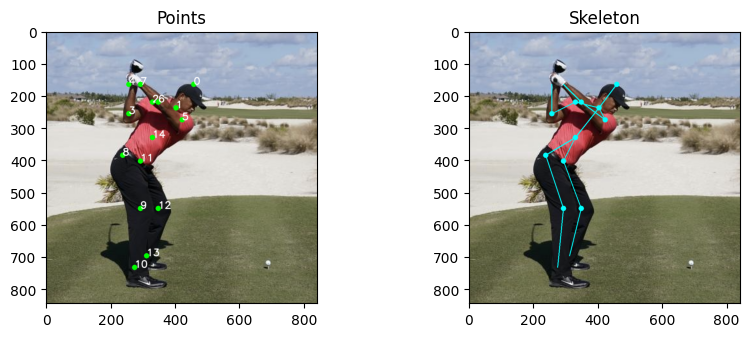

In [31]:
# display points and skeleton

imPoints = image.copy()
imSkeleton = image.copy()
# Draw points
for i, p in enumerate(points):
    cv2.circle(imPoints, p, 8, (0, 255,0), thickness=-1, lineType=cv2.FILLED)
    cv2.putText(imPoints, "{}".format(i), p, cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, lineType=cv2.LINE_AA)

# Draw skeleton
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(imSkeleton, points[partA], points[partB], (255, 255, 0), 2)
        cv2.circle(imSkeleton, points[partA], 8, (255, 255, 0), thickness=-1, lineType=cv2.FILLED)


cv2_imshow([(imPoints, "Points"), (imSkeleton, "Skeleton")], figsize=(10,12))